# Experiment1 Networkx基础及绘图语句

In [3]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import jupyterthemes.jtplot as jtplot
jtplot.style()
jtplot.style(theme='onedork') # 选择一个绘图主题 
np.set_printoptions(suppress=True) #取消科学计数法

## 构建网络

In [4]:
G = nx.DiGraph()

+ nx.Graph()：无向图
+ nx.MultiDiGraph()：有向重边图
+ nx.MultiGraph()：无向重边图

### 添加节点

+ 添加一个节点

In [5]:
G.add_node(1)

+ 批量添加节点

In [6]:
G.add_nodes_from([2, 3])

In [7]:
G.nodes()

NodeView((1, 2, 3))

+ 添加节点属性

In [8]:
G.nodes[1]['age'] = 10
G.nodes[2]['age'] = 20

In [9]:
G.nodes.data()

NodeDataView({1: {'age': 10}, 2: {'age': 20}, 3: {}})

### 添加边

In [10]:
G.add_edge(1, 2, weight = 50)
G.add_edge(1, 3, weight = 30)

In [11]:
group_links = [
    (2, 4, {'weight': 20.0}),
    (2, 5, {'weight': 30.0}),
    (5, 3, {'weight': 5.0})
]
G.add_edges_from(group_links)

In [12]:
G[1][3]['weight'] = 10

In [13]:
G.edges.data()

OutEdgeDataView([(1, 2, {'weight': 50}), (1, 3, {'weight': 10}), (2, 4, {'weight': 20.0}), (2, 5, {'weight': 30.0}), (5, 3, {'weight': 5.0})])

### 访问点和边 

In [12]:
# 访问所有节点
G.nodes(data=True)

NodeDataView({1: {'age': 10}, 2: {'age': 20}, 3: {}, 4: {}, 5: {}})

In [13]:
# 访问所有边
G.edges()

OutEdgeView([(1, 2), (1, 3), (2, 4), (2, 5), (5, 3)])

In [14]:
# 查看结点数
G.number_of_nodes()

5

In [15]:
# 查看边数
G.number_of_edges()

5

In [16]:
# 查看节点属性
G.nodes[1]

{'age': 10}

In [17]:
# 查看节点属性
G.edges[1, 2]

{'weight': 50}

In [18]:
# 查看邻居节点
G.adj[1]

AtlasView({2: {'weight': 50}, 3: {'weight': 10}})

## 网络可视化

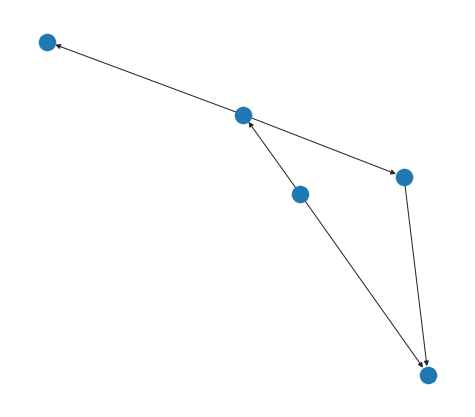

In [14]:
nx.draw(G)

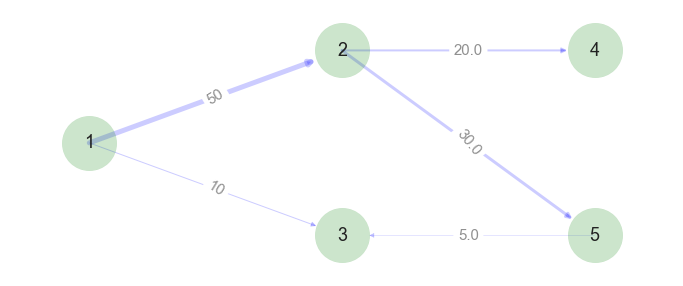

In [17]:
fig = plt.figure(figsize=(12, 5))     
pos={1: np.array([ 0.2,  0.5]),
 2: np.array([ 0.4,  0.8]),
 3: np.array([ 0.4,  0.2 ]),
 4: np.array([ 0.6,  0.8]),
 5: np.array([ 0.6,  0.2])}

width=[float(d['weight']*.1) for (u,v,d) in G.edges(data=True)]
edge_labels=dict([((u,v,),d['weight']) for u,v,d in G.edges(data=True)])
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels, font_size = 15,alpha = .5)
nx.draw(G, pos, node_size = 3000, node_color = 'green',
        alpha = 0.2, width = width, edge_color='blue',style='solid')
nx.draw_networkx_labels(G,pos,font_size=18)
plt.show()

## 加载自带数据

+ Zachary空手道俱乐部

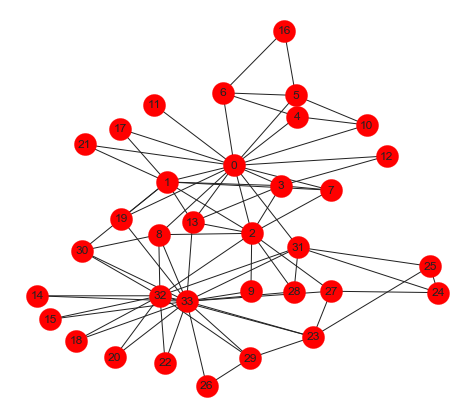

In [18]:
#获得Karate数据 
G = nx.karate_club_graph()
# 设置布局算法
pos = nx.kamada_kawai_layout(G)
# pos = nx.spring_layout(G)
# pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color ='red')

+ circular_layout:将节点位置调整为圆形；
+ random_layout:将节点随机的放在一个单位正方形内；
+ shell_layout:将节点放于多个同心圆内；
+ spring_layout:使用FR算法来定位节点；
+ mspectral_layout:利用图拉普拉斯的特征向量定位节点

{0: Text(0.025952650870201086, 0.33261790117208934, '0'),
 1: Text(-0.15415401998699485, 0.25105994180495667, '1'),
 2: Text(0.07281129985501672, -0.0033983417191491712, '2'),
 3: Text(0.15120783208751354, 0.23250616326537624, '3'),
 4: Text(0.1931354376765071, 0.5744542850931743, '4'),
 5: Text(0.1899636281593889, 0.6790170176541415, '5'),
 6: Text(-0.004421945191688926, 0.6919575323959263, '6'),
 7: Text(0.28351953005522307, 0.21023574187161256, '7'),
 8: Text(-0.17565775060582328, -0.009901424425590936, '8'),
 9: Text(0.0706128957294572, -0.2892516018364106, '9'),
 10: Text(0.3798082660350309, 0.5326230162525754, '10'),
 11: Text(-0.187765463455571, 0.633251898662656, '11'),
 12: Text(0.4337441257712706, 0.3795047126503021, '12'),
 13: Text(-0.08512009044562052, 0.052681953420171374, '13'),
 14: Text(-0.5000670290747938, -0.3124443233276982, '14'),
 15: Text(-0.46577852066243075, -0.42902512435251583, '15'),
 16: Text(0.15957837406503, 0.9999999999999999, '16'),
 17: Text(-0.2793309

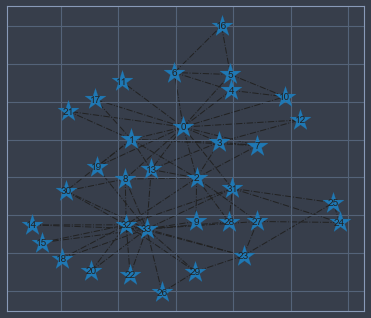

In [21]:
# 改变节点的大小和颜色 
nx.draw_networkx_nodes(G, pos=pos, with_labels=True, node_size=500, node_shape='*') 
# 绘制边，改变颜色和样式 
nx.draw_networkx_edges(G, pos=pos, style='dashdot') 
# 画节点的标签
nx.draw_networkx_labels(G, pos=pos, font_size=10)

## 保存和加载数据集

### 保存数据

In [25]:
# nx.write_pajek(G, 'data/demo.net')

In [26]:
# nx.write_gexf(G, 'data/demo.gexf')

### 加载数据

In [27]:
# G = nx.read_pajek('data/demo.net')

In [28]:
# G = nx.read_gexf('data/demo.gexf')

## 图的基本算法

### 迪杰斯特拉（Dijkstra）最短路径算法

In [29]:
nx.dijkstra_path(G, 0, 26)

[0, 8, 33, 26]

In [30]:
nx.shortest_path(G, 0, 26)

[0, 8, 33, 26]

In [31]:
nx.shortest_path_length(G, 0, 26)

3

### 广度优先搜索算法(Breadth First Search, BFS)

In [32]:
# 以4为顶点,广度遍历
list(nx.bfs_tree(G, 4))

[4,
 0,
 6,
 10,
 1,
 2,
 3,
 5,
 7,
 8,
 11,
 12,
 13,
 17,
 19,
 21,
 31,
 16,
 30,
 9,
 27,
 28,
 32,
 33,
 24,
 25,
 23,
 14,
 15,
 18,
 20,
 22,
 29,
 26]

### 深度优先搜索算法(Depth First Search, DFS)

In [33]:
# 以5为顶点, 深度遍历, 限定深度为3
T = nx.dfs_tree(G, source=5, depth_limit=3)
list(T)

[5,
 0,
 1,
 2,
 3,
 7,
 13,
 17,
 19,
 21,
 30,
 4,
 6,
 10,
 8,
 32,
 33,
 11,
 12,
 31,
 24,
 25,
 28,
 16]